In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
data = fetch_openml(data_id=531)



c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
print(data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [3]:
data.data.shape

(506, 13)

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)



In [5]:
y_test.shape

(102,)

In [6]:
scaler_X = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [7]:
from PSO_UQ import PSO_UQ
from GA_UQ import GA_UQ
PSO_fitnesses=[]
GA_instances=[]

In [8]:
import time as t
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
def trainAndreport(name,model):
    model.fit(X_train_scaled, y_train)
    
    ## Predict on training set
    #y_train_pred_scaled = model.predict(X_train_scaled)
    #y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1,1))
        
    ## Calculate R2 and RMSE for training set
    #train_r2 = r2_score(y_train, y_train_pred)
    #train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        
    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
        
    # Calculate R2 and RMSE for test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
    start_time=t.time()
    solution,solution_fitness, ga_instance=GA_UQ(list(y_test_pred),list(y_test))
    ga_duration=t.time()-start_time
    
    start_time=t.time()
    pos,cost,optimizer,fitness=PSO_UQ(list(y_test_pred),list(y_test))
    pso_duration=t.time()-start_time
    
    PSO_fitnesses.append(fitness)
    GA_instances.append(ga_instance)
        
    # Store results in a dictionary
    result = {
            "Model": name,
            #"Train R2": train_r2,
            #"Train RMSE": train_rmse,
            "R2": test_r2,
            "RMSE": test_rmse,
            "a_PSO":pos[0],
            "b_PSO":pos[1],
            "Fitness_PSO":cost*-1,
            "time_PSO":pso_duration,
            "a_GA":solution[0],
            "b_GA":solution[1],
            "Fitness_GA":solution_fitness,
            "time_GA":ga_duration
    }
    results.append(result)
    print(result)
    

In [9]:
results = []

In [10]:
from sklearn.linear_model import LinearRegression
trainAndreport("Linear Regression",LinearRegression())

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'Linear Regression', 'R2': 0.6687594935356321, 'RMSE': 4.928602182665336, 'a_PSO': 2.272898586504482, 'b_PSO': 0.598004450307423, 'Fitness_PSO': 0.0747276999875259, 'time_PSO': 1.49470853805542, 'a_GA': 2.186771008246886, 'b_GA': 0.5606264186637588, 'Fitness_GA': 0.07475526441919086, 'time_GA': 0.2433779239654541}


In [11]:
from sklearn.svm import SVR
trainAndreport("SVR",SVR())


c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'SVR', 'R2': 0.6194523099637247, 'RMSE': 5.282707807865395, 'a_PSO': 1.9520808045882347, 'b_PSO': 0.8266187003916627, 'Fitness_PSO': 0.08647352070738057, 'time_PSO': 1.4766085147857666, 'a_GA': 2.1991523199886287, 'b_GA': 0.9900316823471988, 'Fitness_GA': 0.08671652655320046, 'time_GA': 0.26721882820129395}


In [12]:
from sklearn.ensemble import RandomForestRegressor
trainAndreport("Random Forest", RandomForestRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'Random Forest', 'R2': 0.8921390213790762, 'RMSE': 2.8124461981782085, 'a_PSO': 2.2722872218477206, 'b_PSO': 0.04673112563213522, 'Fitness_PSO': 0.08251502411197947, 'time_PSO': 1.452465295791626, 'a_GA': 2.5573275851052357, 'b_GA': 0.01247298263482799, 'Fitness_GA': 0.0835472763879797, 'time_GA': 0.25493645668029785}


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
trainAndreport("GradientBoostingRegressor", GradientBoostingRegressor(random_state=42))

c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\naima\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause

{'Model': 'GradientBoostingRegressor', 'R2': 0.9153299998058537, 'RMSE': 2.4918209073731656, 'a_PSO': 2.1727338640529337, 'b_PSO': 2.0678295499922115, 'Fitness_PSO': 0.0815041917299681, 'time_PSO': 1.525918960571289, 'a_GA': 2.084606358453527, 'b_GA': 2.144851990274903, 'Fitness_GA': 0.08148315271591264, 'time_GA': 0.25309014320373535}


In [14]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results)
#results_df=results_df.drop(["time_GA","time_PSO"],axis=1)
results_df=results_df.round(3)
print(results_df)

                       Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0          Linear Regression  0.669  4.929  2.273  0.598        0.075   
1                        SVR  0.619  5.283  1.952  0.827        0.086   
2              Random Forest  0.892  2.812  2.272  0.047        0.083   
3  GradientBoostingRegressor  0.915  2.492  2.173  2.068        0.082   

   time_PSO   a_GA   b_GA  Fitness_GA  time_GA  
0     1.495  2.187  0.561       0.075    0.243  
1     1.477  2.199  0.990       0.087    0.267  
2     1.452  2.557  0.012       0.084    0.255  
3     1.526  2.085  2.145       0.081    0.253  


In [15]:
results_df["time_PSO"]=" "
results_df=results_df.drop("time_GA",axis=1)
print(results_df)

                       Model     R2   RMSE  a_PSO  b_PSO  Fitness_PSO  \
0          Linear Regression  0.669  4.929  2.273  0.598        0.075   
1                        SVR  0.619  5.283  1.952  0.827        0.086   
2              Random Forest  0.892  2.812  2.272  0.047        0.083   
3  GradientBoostingRegressor  0.915  2.492  2.173  2.068        0.082   

  time_PSO   a_GA   b_GA  Fitness_GA  
0           2.187  0.561       0.075  
1           2.199  0.990       0.087  
2           2.557  0.012       0.084  
3           2.085  2.145       0.081  


In [16]:

print(results_df.to_latex(index=False,float_format="{:.3f}".format))

\begin{tabular}{lrrrrrlrrr}
\toprule
Model & R2 & RMSE & a_PSO & b_PSO & Fitness_PSO & time_PSO & a_GA & b_GA & Fitness_GA \\
\midrule
Linear Regression & 0.669 & 4.929 & 2.273 & 0.598 & 0.075 &   & 2.187 & 0.561 & 0.075 \\
SVR & 0.619 & 5.283 & 1.952 & 0.827 & 0.086 &   & 2.199 & 0.990 & 0.087 \\
Random Forest & 0.892 & 2.812 & 2.272 & 0.047 & 0.083 &   & 2.557 & 0.012 & 0.084 \\
GradientBoostingRegressor & 0.915 & 2.492 & 2.173 & 2.068 & 0.082 &   & 2.085 & 2.145 & 0.081 \\
\bottomrule
\end{tabular}



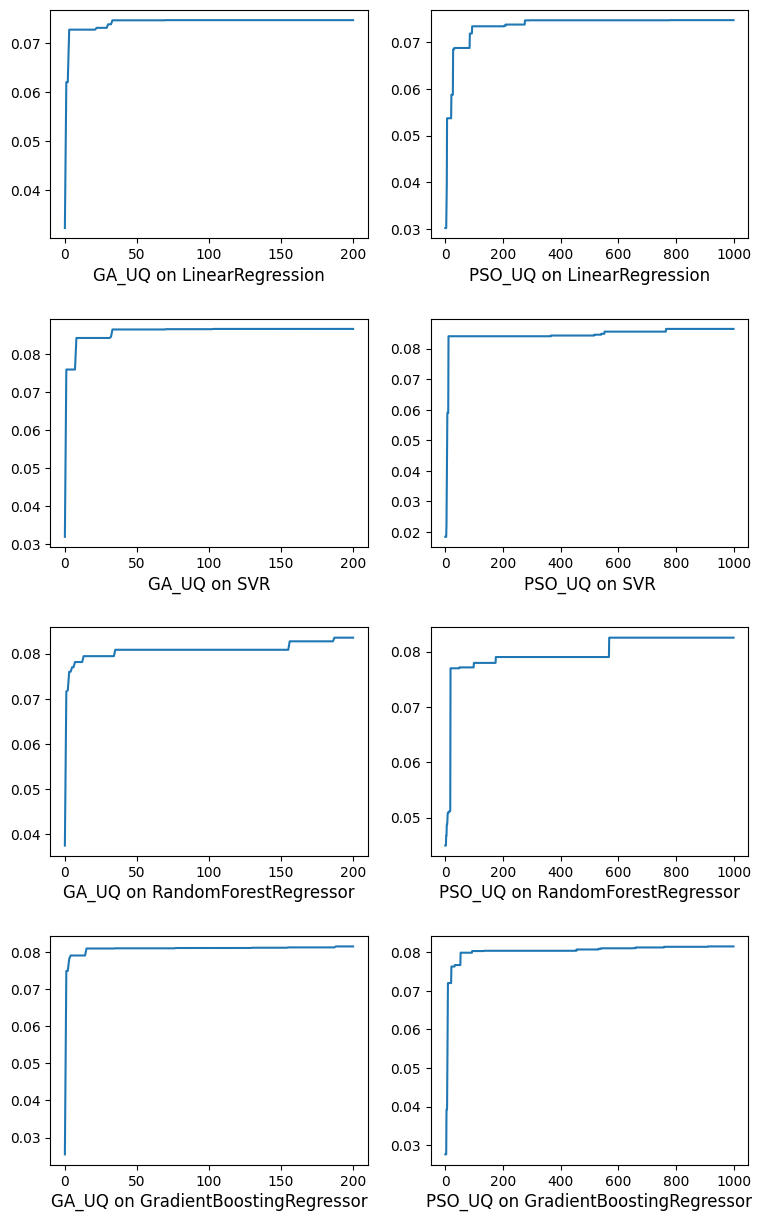

In [17]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,2,figsize=(9,15))
names=["LinearRegression","SVR","RandomForestRegressor","GradientBoostingRegressor"]
for i in range(4):
    y=np.maximum.accumulate(GA_instances[i].solutions_fitness)[::16]
    x=range(len(y))
    ax[i,0].plot(x,y)
    x=range(len(PSO_fitnesses[i]))
    y=PSO_fitnesses[i]
    ax[i,1].plot(x,y)
    ax[i,0].set_title("GA_UQ on "+names[i],y=-.22)
    ax[i,1].set_title("PSO_UQ on "+names[i],y=-.22)
plt.subplots_adjust(hspace=0.35)